In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_excel('data/SaleData.xlsx')
dia = pd.read_csv('data/diamonds.csv',error_bad_lines = False)
imdb = pd.read_csv('data/imdb.csv',escapechar = '\\')
movies = pd.read_csv('data/movie_metadata.csv')

#### Q1 Find the least amount sale that was done for each item

In [5]:
df.groupby(['Item'])['Sale_amt'].min().reset_index()

,Item,Sale_amt
0,Cell Phone,3375.0
1,Desk,250.0
2,Home Theater,2000.0
3,Television,8386.0
4,Video Games,936.0


#### Q2 compute total sales at each year X region

In [6]:
df['Year'] =  df['OrderDate'].apply(lambda d: d.year)

In [7]:
pd.DataFrame(df.groupby(['Year','Region'])['Sale_amt'].sum())

Sale_amt
Year Region           
2018 Central  479825.0
     East     293780.0
     West     105424.0
2019 Central  349944.5
     East      27227.0
     West      49475.0

#### Q3 append column with no of days difference from present date to each order date

In [8]:
import datetime

In [9]:
df['OrderDate'] = pd.to_datetime(df['OrderDate']).dt.date

In [10]:
df['daysdiff'] = list(map(lambda x: datetime.date.today() - x, df['OrderDate']))

In [11]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,Year,daysdiff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,2018,769 days
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,2018,752 days
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,2018,735 days
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,2018,718 days
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,2018,701 days


#### Q4 get dataframe with manager as first column and  salesman under them as lists in rows in second column.

In [12]:
uniMan = df['Manager'].unique()

In [13]:
x= list(map(lambda manager:(df[df['Manager']==manager]['SalesMan'].unique()),uniMan))

In [14]:
pd.DataFrame({'Manager': uniMan, 'SalesMan': x})

,Manager,SalesMan
0,Martha,"[Alexander, Steven, Diana]"
1,Hermann,"[Shelli, Luis, Sigal]"
2,Timothy,"[David, Stephen]"
3,Douglas,"[Michael, Karen, John]"


#### Q5 For all regions find number of salesman and number of units

In [15]:
pd.merge(df.groupby('Region')['SalesMan'].nunique(),df.groupby('Region')['Units'].sum(),on='Region')

,SalesMan,Units
Region,,
Central,6,1199
East,3,691
West,2,231


In [16]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,Year,daysdiff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,2018,769 days
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,2018,752 days
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,2018,735 days
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,2018,718 days
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,2018,701 days


#### Q6 Find total sales as percentage for each manager

In [17]:
pd.DataFrame(100*(df.groupby('Manager')['Sale_amt'].sum()/df['Sale_amt'].sum()))

,Sale_amt
Manager,
Douglas,18.308990
Hermann,27.963188
Martha,36.187629
Timothy,17.540193


In [18]:
imdb = pd.read_csv('data/imdb.csv',escapechar = '\\')

#### Q7 get imdb rating for fifth movie of dataframe

In [19]:
imdb['imdbRating'][4]

8.7

#### Q8 return titles of movies with shortest and longest run time

In [20]:
imdb[(imdb['duration'] == imdb['duration'].max()) | (imdb['duration'] == imdb['duration'].min())]

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
7535,titles04/index.html.11114,tt1063713,Baseball The National Pastime (TV Episode 1994),baseball the national pastime tv episode,http://www.imdb.com/title/tt1063713/,8.2,52.0,68400.0,1994.0,video.episode,...,0,0,0,0,0,1,0,0,0,0
13682,titles04/index.html.8070,tt0343112,Traffic Crossing Leeds Bridge (1888),traffic crossing leeds bridge,http://www.imdb.com/title/tt0343112/,7.2,1442.0,2.0,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0


#### Q9 sort by two columns - release_date (earliest) and Imdb rating(highest to lowest)

In [21]:
(imdb.sort_values(['imdbRating','year'],ascending = False)).head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
6465,titles03/index.html.6668,tt2557512,Umang Tarang (TV Series 1989),umang tarang tv series,http://www.imdb.com/title/tt2557512/,9.9,720.0,NaN,1989.0,video.tv,...,0,0,0,0,0,0,0,0,0,0
9029,titles04/index.html.13615,tt2103188,Grand Theft Auto V (Video Game 2013),grand theft auto v video game,http://www.imdb.com/title/tt2103188/,9.8,17498.0,NaN,2013.0,game,...,0,0,0,0,0,0,0,0,0,0
7320,titles04/index.html.10706,tt0903747,Breaking Bad (TV Series 2008–2013),breaking bad tv series,http://www.imdb.com/title/tt0903747/,9.6,512842.0,2700.0,2008.0,video.tv,...,0,0,0,0,0,0,0,1,0,0
3366,titles03/index.html.3034,tt0185906,Band of Brothers - Wir waren wie Brüder (TV Mi...,band of brothers wir waren wie br der tv mini ...,http://www.imdb.com/title/tt0185906/,9.6,147400.0,42300.0,2001.0,video.tv,...,0,0,0,0,0,0,0,0,0,0
5030,titles03/index.html.5055,tt0944947,Game of Thrones - Das Lied von Eis und Feuer (...,game of thrones das lied von eis und feuer tv ...,http://www.imdb.com/title/tt0944947/,9.5,547534.0,3600.0,2011.0,video.tv,...,0,0,0,0,0,0,0,0,0,0


#### Q10 subset revenue more than 2 million and spent less than 1 million & duration between 30 mintues to 180 minutes

In [22]:
q10 = pd.read_csv('data/movie_metadata.csv')

In [23]:
q10 = q10[(q10.gross>2000000) & (q10.budget<1000000) & (q10.duration > 30) & (q10.duration < 180)]

In [24]:
dia = pd.read_csv('data/diamonds.csv',error_bad_lines = False)

In [25]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


#### Q11 count the duplicate rows of diamonds DataFrame.

In [26]:
(dia[dia.duplicated()]).shape[0]

149

#### Q12 droping those rows where any value in a row is missing in carat and cut columns

In [27]:
dia['carat'] = pd.to_numeric(dia['carat'],errors = 'coerce')
dia['z'] = pd.to_numeric(dia['z'],errors = 'coerce')

In [28]:
dia.dropna().head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


#### Q13 subset only numeric columns

In [29]:
(dia.select_dtypes(include=['float','int'])).head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


#### Q14 compute volume as (x*y*z) when depth > 60 else 8


In [30]:
dia['vol'] = dia.x * dia.y * dia.z

In [31]:
dia.loc[dia.depth < 60,'vol']=8

#### Q15 impute missing price values with mean


In [32]:
dia.fillna(value=dia.mean()).head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725


# Bonus Questions

### Question 1:
Generate a report that tracks the various Genere combinations for each type year on year. The result
data frame should contain type, Genere_combo, year, avg_rating, min_rating, max_rating,
total_run_time_mins

In [33]:
movies = pd.read_csv('data/movie_metadata.csv')
imdb = pd.read_csv('data/imdb.csv', escapechar='\\')

In [34]:
movies.groupby(['genres','title_year'])['imdb_score','duration'].agg(['min','max','mean','sum']).head()

c:\users\saikrishna.punna\tigerml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


imdb_score                duration                     
                         min  max mean  sum      min    max   mean    sum
genres title_year                                                        
Action 1992.0            7.0  7.0  7.0  7.0    126.0  126.0  126.0  126.0
       1993.0            5.1  5.1  5.1  5.1     87.0   87.0   87.0   87.0
       1997.0            3.7  3.7  3.7  3.7    125.0  125.0  125.0  125.0
       2003.0            8.1  8.1  8.1  8.1    111.0  111.0  111.0  111.0
       2008.0            6.2  6.2  6.2  6.2    110.0  110.0  110.0  110.0

### Question 2:
Is there a realation between the length of a movie title and the ratings ? Generate a report that captures
the trend of the number of letters in movies titles over years. We expect a cross tab between the year of
the video release and the quantile that length fall under. The results should contain year, min_length,
max_length, num_videos_less_than25Percentile, num_videos_25_50Percentile ,
num_videos_50_75Percentile, num_videos_greaterthan75Precentile


In [35]:
imdb['tit_len'] = imdb['title'].str.len()

In [36]:
imdb['year'] = pd.to_numeric(imdb['year'], errors='coerce')

In [37]:
df1 = imdb.groupby('year')['tit_len'].agg(['min','max','count'])

In [38]:
imdb['length_quantile'] = pd.qcut(imdb['tit_len'],q=4,labels='0-25% 25-50% 50-75% 75-100%'.split())
df2 = pd.crosstab(imdb['year'],imdb['length_quantile'])

In [39]:
pd.merge(df1,df2,on='year').head()

,min,max,count,0-25%,25-50%,50-75%,75-100%
year,,,,,,,
1888.0,28,36,2,0,1,1,0
1890.0,26,26,1,0,1,0,0
1893.0,23,23,1,0,1,0,0
1894.0,38,38,1,0,0,1,0
1899.0,29,29,1,0,1,0,0


### Question 3:
 In diamonds data set Using the volumne calculated above, create bins that have equal population within
them. Generate a report that contains cross tab between bins and cut. Represent the number under
each cell as a percentage of total.


In [83]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol,Volume_quantile
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203,0-25%
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000,0-25%
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000,0-25%
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458,0-25%
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725,0-25%


In [80]:
df = dia.copy()
df['Volume_quantile'] = pd.qcut(df['vol'],q=4,labels='0-25% 25-50% 50-75% 75-100%'.split())

In [84]:
pd.crosstab(df['Volume_quantile'],df['cut'],normalize=True)*100

cut,Fair,Good,Ideal,Premium,Very Good
Volume_quantile,,,,,
0-25%,0.532102,2.677197,8.591505,7.087899,6.116395
25-50%,0.291080,1.659343,13.550995,5.100395,4.392161
50-75%,1.397927,3.148117,8.118731,5.524964,6.809797
75-100%,0.763854,1.609285,9.690936,7.855461,5.081855


### Question 4:
Generate a report that tracks the Avg. imdb rating quarter on quarter, in the last 10 years, for movies
that are top performing. You can take the top 10% grossing movies every quarter. Add the number of top
performing movies under each genere in the report as well.

In [42]:
df = movies[movies.title_year > (movies.title_year.max()-10)].copy()

In [43]:
df = df[df.gross > df.gross.quantile(0.90)]

In [44]:
df1 = df.genres.str.split('|',expand=True).stack().str.get_dummies().sum(level=0)

In [45]:
df=pd.concat([df,df1],axis=1)

In [46]:
pd.merge(df.groupby('title_year')['imdb_score'].mean(),df.groupby('title_year')['Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'].agg('sum'),on='title_year')

c:\users\saikrishna.punna\tigerml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
2007.0,6.933333,6,8,4,0,8,0,3,4,5,...,1,1,0,2,5,2,0,1,0,0
2008.0,7.057143,8,6,3,0,4,1,6,5,3,...,0,0,1,0,3,2,0,2,0,0
2009.0,6.723529,9,13,4,1,7,1,3,6,6,...,0,1,0,2,2,7,1,3,0,0
2010.0,6.877778,7,14,6,0,7,0,2,8,9,...,0,0,1,0,3,5,0,1,0,1
2011.0,6.982353,11,12,5,0,7,2,2,5,4,...,0,0,1,1,1,4,1,4,0,0
2012.0,7.261905,8,15,5,1,7,0,7,6,9,...,0,0,1,0,3,5,0,4,1,1
2013.0,7.242105,6,13,4,0,6,3,4,6,8,...,1,0,1,0,2,7,0,3,0,0
2014.0,7.235000,14,16,3,1,7,2,5,4,6,...,0,0,0,2,1,12,0,4,1,0
2015.0,6.933333,9,15,7,1,10,2,8,10,8,...,0,2,0,0,3,10,0,7,0,1


### Question 5:
Bucket the movies into deciles using the duration. Generate the report that tracks various features like
nomiations, wins, count, top 3 geners in each decile.

In [47]:
imdb['duration_dec'] = pd.qcut(imdb.duration,q=10,
                            labels = '0-10 10-20 20-30 30-40 40-50 50-60 60-70 70-80 80-90 90-100'.split())

In [48]:
df1 = imdb.groupby('duration_dec')['nrOfNominations','nrOfWins'].agg('sum')

c:\users\saikrishna.punna\tigerml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [73]:
x = imdb.groupby('duration_dec')['Action', 'Adult', 'Adventure', 'Animation', 'Biography','Comedy',
                              'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy','FilmNoir', 
                              'GameShow', 'History', 'Horror', 'Music', 'Musical','Mystery', 
                              'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
                              'TalkShow', 'Thriller', 'War', 'Western'].agg('sum')
x

c:\users\saikrishna.punna\tigerml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
duration_dec,,,,,,,,,,,,,,,,,,,,,
0-10,119,0,115,469,13,1165,42,239,196,317,...,62,45,53,75,471,8,149,9,16,17
10-20,96,0,65,24,27,161,116,177,312,20,...,3,24,28,59,41,3,20,25,10,5
20-30,142,6,190,155,34,479,216,172,444,105,...,41,22,89,103,1,9,220,47,18,17
30-40,226,9,229,122,45,736,250,147,565,143,...,2,2,209,162,0,21,16,175,38,45
40-50,181,2,157,48,31,517,201,70,472,91,...,0,0,192,96,0,27,0,154,37,53
50-60,218,0,169,36,36,526,225,59,573,84,...,0,0,206,140,0,23,2,169,44,37
60-70,273,0,195,35,60,530,248,40,728,85,...,0,0,255,97,0,37,4,188,64,37
70-80,277,1,187,19,89,428,274,25,815,57,...,0,0,263,82,0,39,0,219,62,42
80-90,268,1,203,18,126,279,238,50,889,38,...,2,3,261,71,0,34,6,186,77,36


In [72]:
xt = x.transpose()

In [51]:
m=[]
for j in xt.columns:
    top3 = sorted(xt[j],reverse=True)[:3]
    for i in xt.index:
        if xt[j][i] in top3:
            m.append(i)

In [52]:
Top3 = pd.DataFrame(np.reshape(m,(10,3)),
                    index = '0-10 10-20 20-30 30-40 40-50 50-60 60-70 70-80 80-90 90-100'.split(), 
                    columns='Top1 Top2 Top3'.split())

In [53]:
pd.concat([df1,Top3],axis = 1)

,nrOfNominations,nrOfWins,Top1,Top2,Top3
0-10,7928,3349,Animation,Comedy,Short
10-20,4923,1912,Comedy,Documentary,Drama
20-30,8946,3730,Comedy,Drama,TalkShow
30-40,3128,2740,Comedy,Drama,Horror
40-50,3109,2511,Comedy,Crime,Drama
50-60,3981,3253,Comedy,Crime,Drama
60-70,5713,4632,Action,Comedy,Drama
70-80,6470,5473,Action,Comedy,Drama
80-90,9667,7999,Action,Comedy,Drama
90-100,12095,9595,Action,Drama,Romance


### Question 6
Using the movie metadata set and the imdb data set come up with finidings (slice and dice the data to
identify insights) and also create charts whereever possible.

In [54]:
imdb.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western', 'tit_len', 'length_quantile',
       'duration_dec'],
      dtype='object')

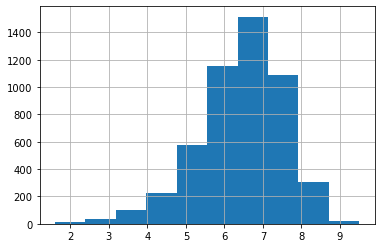

In [55]:
movies['imdb_score'].hist(bins = 10,)

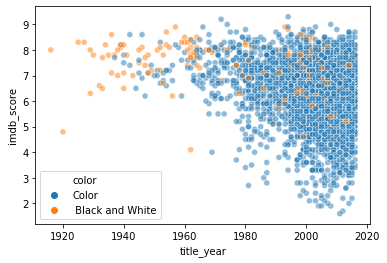

In [56]:
sns.scatterplot(x=movies['title_year'],y=movies['imdb_score'],hue=movies['color'],alpha=0.5)

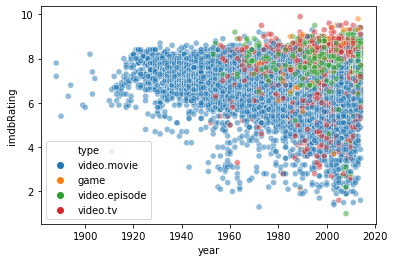

In [57]:
sns.scatterplot(x=imdb['year'],y=imdb['imdbRating'],hue=imdb['type'],alpha=0.5)

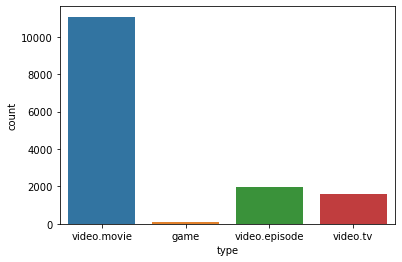

In [58]:
sns.countplot(x='type',data=imdb)

Text(0.5, 1, 'imdb.corr()')

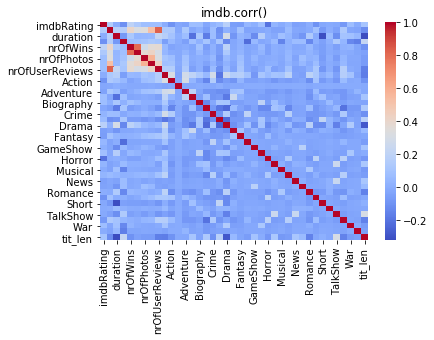

In [59]:
sns.heatmap(imdb.corr(),cmap='coolwarm')
plt.title('imdb.corr()')

Text(0.5, 1, 'movies.corr()')

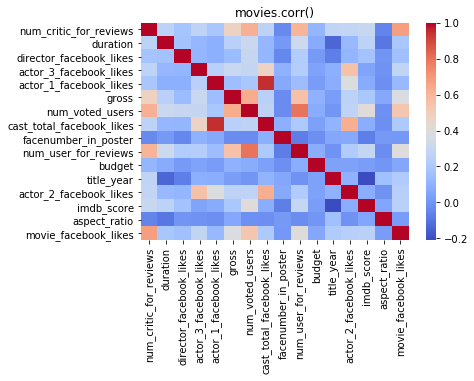

In [60]:
sns.heatmap(movies.corr(),cmap='coolwarm')
plt.title('movies.corr()')

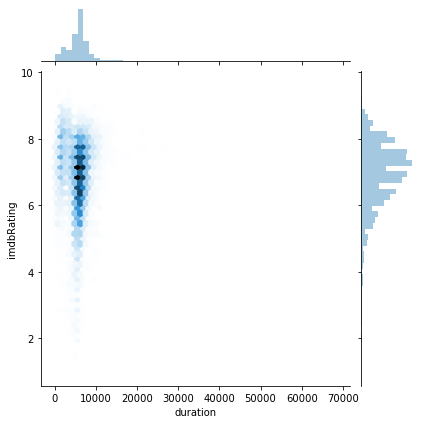

In [61]:
g=sns.jointplot(x='duration',y='imdbRating',data=imdb,kind='hex')

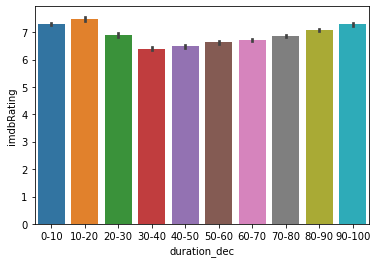

In [62]:
sns.barplot(x='duration_dec',y='imdbRating',data=imdb)

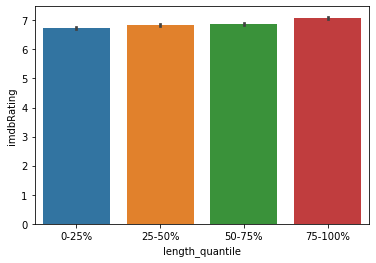

In [63]:
sns.barplot(x='length_quantile',y='imdbRating',data=imdb)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

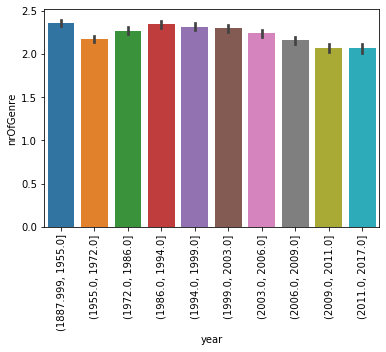

In [64]:
x=pd.qcut(imdb['year'],q=10)
sns.barplot(x=x,y='nrOfGenre',data=imdb)
plt.xticks(rotation=90)

In [65]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

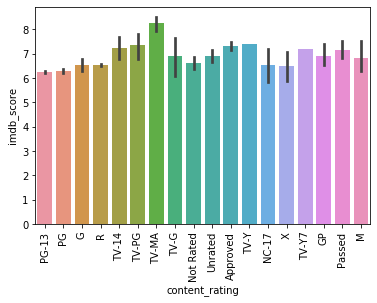

In [66]:
sns.barplot(x='content_rating',y='imdb_score',data=movies)
plt.xticks(rotation=90)